# Manipulating Data

Data manipulation is the foundation of data science. Raw data, often messy and unorganized, hold the potential for valuable insights, but only if it's transformed into a usable format. This manipulation process involves tasks like cleaning inconsistencies, organizing data into structures, and creating new features. Pandas allows efficient data manipulation with many of its structures.

- [The anatomy of a DF](#the-anatomy-of-a-dataframe)
- [Manipulating Strings](#manipulating-strings)
- [Reassigning values](#reassigning-values)
  - [inplace](#inplace)
- [Missing Data](#missing-data)
  - [.fillna](#fillna)
  - [.dropna](#dropna)
- [Creating Data](#creating-data)
- [Removing Data](#removing-data)
- [Changing data's order](#changing-datas-order)


In [1]:
# Importing Pandas and Data
import pandas as pd

car_sales = pd.read_csv('datasets/car-sales.csv')

## The anatomy of a DataFrame

In the image bellow highlights the structure of a Data Frame.

The biggest takeaway of this image are the axis. Columns have axis = 1, whereas rows have axis = 0.

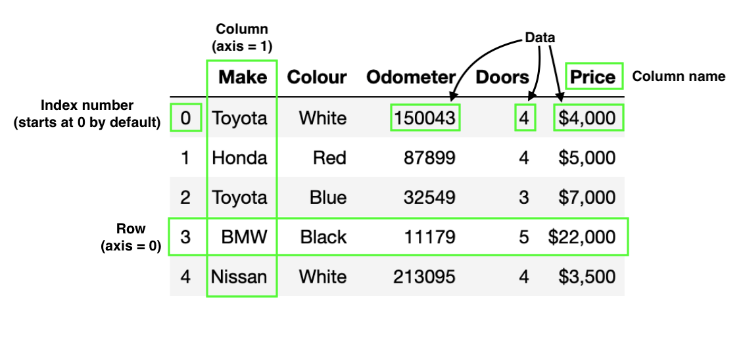


## Manipulating strings

If you can imagine it, chances are pandas can do it. Pandas is based on Python, however you can manipulate strings and values in python, you can do the same in pandas.

To access the string value of a column, use `.str`, this method allows usage of, as previous mentioned before, python methods of string manipulation.


In [2]:
# Anything you can do in a str in python you can do it in a pandas str
car_sales['Make'].str.lower()

0    toyota
1     honda
2    toyota
3       bmw
4    nissan
5    toyota
6     honda
7     honda
8    toyota
9    nissan
Name: Make, dtype: object

## Reassigning values

The code above doesn't actually change the column's value. This only happens when the column is reassigned to another value. This trend occurs throughout all kinds of data manipulation with pandas.

### `inplace`

Some functions have a parameter called `inplace` which means a DataFrame is updated in place, without having to reassign it. As you can imagine, this actually saves some time and code.


In [16]:
# Reassigning the value of the column
car_sales['Make'] = car_sales['Make'].str.lower()

## Missing Data

Real datasets aren't always filled, in fact, they are most of the time filled with blank cells and values. Pandas offers some ways of dealing with these errors in the DFs.

### `.fillna`

Real datasets have missing data, pandas describes this data as NaN, and offers the `.fillna` method to fill these holes in datasets. This function is one of the ones that offer the `inplace` parameter.

### `.dropna`

Much like the previous method, `.dropna` also deals with NaN values. In this case, it removes all of the columns that have any type of NaN data in them.


In [4]:
# Loading dataset with missing values
car_sales_missing = pd.read_csv('datasets/car-sales-missing-data.csv')

In [5]:
# Filling the missing values with the mean of the existing ones
car_sales_missing['Odometer'].fillna(car_sales_missing['Odometer'].mean())

0    150043.000000
1     87899.000000
2     92302.666667
3     11179.000000
4    213095.000000
5     92302.666667
6     92302.666667
7     92302.666667
8     60000.000000
9     31600.000000
Name: Odometer, dtype: float64

In [6]:
# Making permanent changes to the DF
car_sales_missing.fillna(
    {'Odometer': car_sales_missing['Odometer'].mean()}, inplace=True
)
car_sales_missing

,Make,Colour,Odometer,Doors,Price
0,Toyota,White,150043.000000,4.0,"$4,000"
1,Honda,Red,87899.000000,4.0,"$5,000"
2,Toyota,Blue,92302.666667,3.0,"$7,000"
3,BMW,Black,11179.000000,5.0,"$22,000"
4,Nissan,White,213095.000000,4.0,"$3,500"
5,Toyota,Green,92302.666667,4.0,"$4,500"
6,Honda,NaN,92302.666667,4.0,"$7,500"
7,Honda,Blue,92302.666667,4.0,NaN
8,Toyota,White,60000.000000,NaN,NaN
9,NaN,White,31600.000000,4.0,"$9,700"


In [7]:
# Dropping (removing) missing values
car_sales_missing.dropna(inplace=True)

## Creating Data

One very other important aspect of manipulating data in a DataFrame, is to crate data. Pandas also offers methods to do so. Much like other types of manipulation in pandas, adding columns and data to the existing columns can be done through assignment of values. This in turn can be done in several ways. One of them is by creating a Series and assigning the Series to a column with the desired name as index. The other ones involve using pythons data structures (such as lists, dicts, sets, etc.) to assign values to a column.

These DataStructures can also be combined with some methods offered by pandas, such as `.assign` and `.insert`. Pandas also allows mathematical operations between the columns themselves if the data contained in them is numerical. `.apply` is a way of applying a function to some data, be it numerical or not.

## Removing Data

To remove a column entirely, use the `.drop` method in the DataFrame, and as arguments, pass the column's name and its axis.


In [8]:
# Columns from Series
seats_column = pd.Series([5, 5, 5, 5, 5])

# New column
car_sales['Seats'] = seats_column

# Filling NaN values
car_sales.fillna({'Seats': 5}, inplace=True)
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Seats
0,toyota,White,150043,4,"$4,000.00",5.0
1,honda,Red,87899,4,"$5,000.00",5.0
2,toyota,Blue,32549,3,"$7,000.00",5.0
3,bmw,Black,11179,5,"$22,000.00",5.0
4,nissan,White,213095,4,"$3,500.00",5.0
5,toyota,Green,99213,4,"$4,500.00",5.0
6,honda,Blue,45698,4,"$7,500.00",5.0
7,honda,Blue,54738,4,"$7,000.00",5.0
8,toyota,White,60000,4,"$6,250.00",5.0
9,nissan,White,31600,4,"$9,700.00",5.0


In [9]:
# Column from python list
fuel_economy = [7.5, 9.2, 5.0, 9.6, 8.7, 4.7, 7.6, 8.7, 3.0, 4.5]
car_sales["Fuel per 100KM"] = fuel_economy
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Seats,Fuel per 100KM
0,toyota,White,150043,4,"$4,000.00",5.0,7.5
1,honda,Red,87899,4,"$5,000.00",5.0,9.2
2,toyota,Blue,32549,3,"$7,000.00",5.0,5.0
3,bmw,Black,11179,5,"$22,000.00",5.0,9.6
4,nissan,White,213095,4,"$3,500.00",5.0,8.7
5,toyota,Green,99213,4,"$4,500.00",5.0,4.7
6,honda,Blue,45698,4,"$7,500.00",5.0,7.6
7,honda,Blue,54738,4,"$7,000.00",5.0,8.7
8,toyota,White,60000,4,"$6,250.00",5.0,3.0
9,nissan,White,31600,4,"$9,700.00",5.0,4.5


In [10]:
# Creating column that shows how much fuel the car has used
car_sales['Total fuel used'] = (
    car_sales['Odometer (KM)'] / 100 * car_sales['Fuel per 100KM']
)
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Seats,Fuel per 100KM,Total fuel used
0,toyota,White,150043,4,"$4,000.00",5.0,7.5,11253.225
1,honda,Red,87899,4,"$5,000.00",5.0,9.2,8086.708
2,toyota,Blue,32549,3,"$7,000.00",5.0,5.0,1627.450
3,bmw,Black,11179,5,"$22,000.00",5.0,9.6,1073.184
4,nissan,White,213095,4,"$3,500.00",5.0,8.7,18539.265
5,toyota,Green,99213,4,"$4,500.00",5.0,4.7,4663.011
6,honda,Blue,45698,4,"$7,500.00",5.0,7.6,3473.048
7,honda,Blue,54738,4,"$7,000.00",5.0,8.7,4762.206
8,toyota,White,60000,4,"$6,250.00",5.0,3.0,1800.000
9,nissan,White,31600,4,"$9,700.00",5.0,4.5,1422.000


In [11]:
# Converting odometer values to miles
car_sales['Odometer (KM)'] = car_sales['Odometer (KM)'].apply(lambda x: x / 1.6)

# Renaming column
car_sales.rename(columns={'Odometer (KM)': 'Odometer (mi)'}, inplace=True)

car_sales

,Make,Colour,Odometer (mi),Doors,Price,Seats,Fuel per 100KM,Total fuel used
0,toyota,White,93776.875,4,"$4,000.00",5.0,7.5,11253.225
1,honda,Red,54936.875,4,"$5,000.00",5.0,9.2,8086.708
2,toyota,Blue,20343.125,3,"$7,000.00",5.0,5.0,1627.450
3,bmw,Black,6986.875,5,"$22,000.00",5.0,9.6,1073.184
4,nissan,White,133184.375,4,"$3,500.00",5.0,8.7,18539.265
5,toyota,Green,62008.125,4,"$4,500.00",5.0,4.7,4663.011
6,honda,Blue,28561.250,4,"$7,500.00",5.0,7.6,3473.048
7,honda,Blue,34211.250,4,"$7,000.00",5.0,8.7,4762.206
8,toyota,White,37500.000,4,"$6,250.00",5.0,3.0,1800.000
9,nissan,White,19750.000,4,"$9,700.00",5.0,4.5,1422.000


In [12]:
# Removing a column
car_sales.drop({'Total fuel used'}, axis=1, inplace=True)

car_sales

,Make,Colour,Odometer (mi),Doors,Price,Seats,Fuel per 100KM
0,toyota,White,93776.875,4,"$4,000.00",5.0,7.5
1,honda,Red,54936.875,4,"$5,000.00",5.0,9.2
2,toyota,Blue,20343.125,3,"$7,000.00",5.0,5.0
3,bmw,Black,6986.875,5,"$22,000.00",5.0,9.6
4,nissan,White,133184.375,4,"$3,500.00",5.0,8.7
5,toyota,Green,62008.125,4,"$4,500.00",5.0,4.7
6,honda,Blue,28561.250,4,"$7,500.00",5.0,7.6
7,honda,Blue,34211.250,4,"$7,000.00",5.0,8.7
8,toyota,White,37500.000,4,"$6,250.00",5.0,3.0
9,nissan,White,19750.000,4,"$9,700.00",5.0,4.5


## Changing data's order

One of the key factors in Data Science is to get arbitrary data, making the analysis as reliable as can be. To do this, pandas offers methods to sample and randomize the data.

To sample some of the data, use the `.sample` method, that uses the number passed as a parameter to select a fraction of the DF and already randomizes the data's order. The data's rows are randomizes, but not the data inside the columns themselves.

The method `.reset_index` automatically resets the indexes to their original order. The `drop` parameter makes it so there is only one column with indexes.


In [13]:
# Sampling the data
car_sales_shuffled = car_sales.sample(frac=1)

car_sales_shuffled

,Make,Colour,Odometer (mi),Doors,Price,Seats,Fuel per 100KM
5,toyota,Green,62008.125,4,"$4,500.00",5.0,4.7
3,bmw,Black,6986.875,5,"$22,000.00",5.0,9.6
0,toyota,White,93776.875,4,"$4,000.00",5.0,7.5
4,nissan,White,133184.375,4,"$3,500.00",5.0,8.7
8,toyota,White,37500.000,4,"$6,250.00",5.0,3.0
7,honda,Blue,34211.250,4,"$7,000.00",5.0,8.7
9,nissan,White,19750.000,4,"$9,700.00",5.0,4.5
2,toyota,Blue,20343.125,3,"$7,000.00",5.0,5.0
1,honda,Red,54936.875,4,"$5,000.00",5.0,9.2
6,honda,Blue,28561.250,4,"$7,500.00",5.0,7.6


In [14]:
# Sampling only 20% of the data
car_sales_shuffled.sample(frac=0.2)

,Make,Colour,Odometer (mi),Doors,Price,Seats,Fuel per 100KM
4,nissan,White,133184.375,4,"$3,500.00",5.0,8.7
9,nissan,White,19750.000,4,"$9,700.00",5.0,4.5


In [15]:
# Resetting the indexes of the DF
car_sales_shuffled.reset_index(drop=True, inplace=True)
car_sales_shuffled

,Make,Colour,Odometer (mi),Doors,Price,Seats,Fuel per 100KM
0,toyota,Green,62008.125,4,"$4,500.00",5.0,4.7
1,bmw,Black,6986.875,5,"$22,000.00",5.0,9.6
2,toyota,White,93776.875,4,"$4,000.00",5.0,7.5
3,nissan,White,133184.375,4,"$3,500.00",5.0,8.7
4,toyota,White,37500.000,4,"$6,250.00",5.0,3.0
5,honda,Blue,34211.250,4,"$7,000.00",5.0,8.7
6,nissan,White,19750.000,4,"$9,700.00",5.0,4.5
7,toyota,Blue,20343.125,3,"$7,000.00",5.0,5.0
8,honda,Red,54936.875,4,"$5,000.00",5.0,9.2
9,honda,Blue,28561.250,4,"$7,500.00",5.0,7.6
